Things I did in this notebook:
* read a csv in  
* changed column names from a list variable  
* dropped columns  
* dropped rows based on a criteria  
* counted rows with no values  
* sorted columns  
* aggregated columns into a total mean  
* added columns extracted from existing datetime column  
* converted data types from a dictionary variable  
* created a pivot table after managing data type issues  
* created a new df using groupby and visualized it as a line chart  
* created a new df using groupby, converting the index to numeric, sorted the index, and visualized it as a line chart

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Check working directory

In [5]:
import os
os.getcwd()

'/resources/Playground'

# I uploaded the csv to this environment manually - Reading a CSV

In [58]:
path=("/resources/Playground/weather_data_formatted.xlsx")
df=pd.read_excel(path)
df.head()

,DATE,BEWO ET,BEWO ETRS,BEWO ETOS,BEWO MN,BEWO MX,BEWO MM,BEWO PC,BEWO PP,BEWO PU,BEWO SR,BEWO TA,BEWO TG,BEWO YM,BEWO UA,BEWO UD,BEWO WG,BEWO WR
0,2000-01-01,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
1,2000-01-02,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
2,2000-01-03,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
3,2000-01-04,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
4,2000-01-05,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD


# Checking column names and updating them

In [8]:
df.columns

Index(['date', 'et', 'etrs', 'etos', 'min_air_temp', 'max_air_temp',
       'mean_air_temp', 'precip_since_reset', 'daily_precip', 'ytd_precip',
       'solar_radiation', 'mean_humidity', 'growing_degree_days',
       'mean_dewpoint_temp', 'avg_wind_speed', 'avg_wind_direction',
       'peak_gust_speed', 'wind_run'],
      dtype='object')

In [59]:
headers = ["date","et","etrs","etos","min_air_temp","max_air_temp","mean_air_temp","precip_since_reset","daily_precip","ytd_precip","solar_radiation","mean_humidity","growing_degree_days","mean_dewpoint_temp","avg_wind_speed","avg_wind_direction","peak_gust_speed","wind_run"]
df.columns=headers
df.head()

,date,et,etrs,etos,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run
0,2000-01-01,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
1,2000-01-02,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
2,2000-01-03,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
3,2000-01-04,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD
4,2000-01-05,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD,NO RECORD


In [10]:
df.columns

Index(['date', 'et', 'etrs', 'etos', 'min_air_temp', 'max_air_temp',
       'mean_air_temp', 'precip_since_reset', 'daily_precip', 'ytd_precip',
       'solar_radiation', 'mean_humidity', 'growing_degree_days',
       'mean_dewpoint_temp', 'avg_wind_speed', 'avg_wind_direction',
       'peak_gust_speed', 'wind_run'],
      dtype='object')

In [11]:
df["et"].describe()

count           7306
unique            37
top       NO RECORD 
freq            1217
Name: et, dtype: object

In [12]:
df.dtypes

date                   datetime64[ns]
et                             object
etrs                           object
etos                           object
min_air_temp                   object
max_air_temp                   object
mean_air_temp                  object
precip_since_reset             object
daily_precip                   object
ytd_precip                     object
solar_radiation                object
mean_humidity                  object
growing_degree_days            object
mean_dewpoint_temp             object
avg_wind_speed                 object
avg_wind_direction             object
peak_gust_speed                object
wind_run                       object
dtype: object

# Dropping columns

In [60]:
df.drop(["et","etrs","etos"], axis=1, inplace=True)

# Dropping rows based on a criteria

In [14]:
df["avg_wind_speed"].value_counts()

NO RECORD     1272
1.71           102
1.79           100
1.83            95
1.92            92
              ... 
4.98             1
3.93             1
0.52             1
5.31             1
7.67             1
Name: avg_wind_speed, Length: 527, dtype: int64

In [61]:
df = df[df["avg_wind_speed"] != "NO RECORD "]
df.head()

,date,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run
1217,2003-05-02,35.32,67.37,52.41,0,0,NO RECORD,487.63,50.2,8.69,31.95,1.93,214.4,15.12,46.3
1218,2003-05-03,39.27,57.04,46.71,0,0,NO RECORD,313.47,60.76,3.52,32.96,2.9,247.72,16.22,69.72
1219,2003-05-04,35.76,51.97,41.55,0,0,NO RECORD,522.21,64.26,0.99,29.4,4.6,231.98,21.04,110.4
1220,2003-05-05,32.95,51.39,40.62,0,0,NO RECORD,384.11,57.88,0.69,25.94,2.87,259.49,13.59,68.8
1221,2003-05-06,25.65,54.73,41.72,0,0,NO RECORD,546.08,60.61,2.37,26.95,2.18,304.56,16.88,52.4


# Checking for empty values in specific row

In [18]:
df["avg_wind_speed"].isna().sum()

0

In [19]:
df["avg_wind_speed"].describe()

count     6034.00
unique     526.00
top          1.71
freq       102.00
Name: avg_wind_speed, dtype: float64

# Sorting values

In [20]:
df.sort_values(by="avg_wind_speed", ascending=False)

,date,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run
2691,2007-05-15,38.67,81.8,62.36,0,0,7.46,680.84,44.77,15.9,36.94,251.28,318.46,13.63,44.76
2892,2007-12-02,32.13,41.39,35.57,5.59,0.09,3.17,45.4,70.74,0,26.61,9.25,200.39,26.08,222
2563,2007-01-07,33.34,40.28,37.48,9.46,0,6.24,141.37,79.97,0,31.83,8.25,214.04,20.69,198
4400,2012-01-18,31.79,36.51,34.72,23.1,1.16,2.71,53.63,92.13,0,32.64,8.21,208.25,29.59,197
2893,2007-12-03,40.28,48.46,44.03,6.01,0.42,3.59,84.09,78.47,0,37.56,7.83,206.29,25.51,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6222,2017-01-13,3.72,27.67,16.97,10.16,0,6.77,23.47,80.7,0,12.03,0,0.29,0.66,0
5434,2014-11-17,2.35,33.24,16.35,13.47,0,2.33,102.15,75.49,0,9.71,0,0,0,0
6221,2017-01-12,9.95,18.13,14.71,10.16,0,6.77,16.26,84.09,0,10.78,0,0,0,0
5152,2014-02-08,8.68,15.24,11.83,4.17,0.3,2.42,15.56,81.45,0,7.24,0,0,0,0


In [62]:
df=df[df["avg_wind_speed"]<200]

In [22]:
df.head(20)

,date,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run
1217,2003-05-02,35.32,67.37,52.41,0,0,NO RECORD,487.63,50.2,8.69,31.95,1.93,214.4,15.12,46.3
1218,2003-05-03,39.27,57.04,46.71,0,0,NO RECORD,313.47,60.76,3.52,32.96,2.9,247.72,16.22,69.72
1219,2003-05-04,35.76,51.97,41.55,0,0,NO RECORD,522.21,64.26,0.99,29.4,4.6,231.98,21.04,110.4
1220,2003-05-05,32.95,51.39,40.62,0,0,NO RECORD,384.11,57.88,0.69,25.94,2.87,259.49,13.59,68.8
1221,2003-05-06,25.65,54.73,41.72,0,0,NO RECORD,546.08,60.61,2.37,26.95,2.18,304.56,16.88,52.4
1222,2003-05-07,31.11,49.95,40.76,0,0,NO RECORD,355.37,59.7,0,26.96,2.17,359.16,15.12,52
1223,2003-05-08,32.45,44.54,37.26,0.08,0.08,NO RECORD,204.42,85.01,0,32.86,1.8,351.89,13.37,43.2
1224,2003-05-09,30.78,52.87,42.64,0.08,0,NO RECORD,367.48,69.17,1.44,32.39,2.37,322.31,15.34,56.9
1225,2003-05-10,39.89,54.73,44.55,0.11,0.03,NO RECORD,273.77,76.54,2.37,37.15,1.48,332.29,16.88,35.4
1226,2003-05-11,37.98,56.88,46.02,0.39,0.28,NO RECORD,374.85,80.26,3.44,39.42,1.6,271.13,21.26,38.3


# AVG WIND SPEED since 2003

In [23]:
df["avg_wind_speed"].mean()

2.3018365655561124

# Creating new columns by extracting data from a datetime column

In [24]:
 df["date"].describe

<bound method NDFrame.describe of 1217   2003-05-02
1218   2003-05-03
1219   2003-05-04
1220   2003-05-05
1221   2003-05-06
          ...    
7301   2019-12-28
7302   2019-12-29
7303   2019-12-30
7304   2019-12-31
7305   2020-01-01
Name: date, Length: 6033, dtype: datetime64[ns]>

In [63]:
df["Year"] = df["date"].dt.year
df.head()

,date,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run,Year
1217,2003-05-02,35.32,67.37,52.41,0,0,NO RECORD,487.63,50.2,8.69,31.95,1.93,214.4,15.12,46.3,2003
1218,2003-05-03,39.27,57.04,46.71,0,0,NO RECORD,313.47,60.76,3.52,32.96,2.9,247.72,16.22,69.72,2003
1219,2003-05-04,35.76,51.97,41.55,0,0,NO RECORD,522.21,64.26,0.99,29.4,4.6,231.98,21.04,110.4,2003
1220,2003-05-05,32.95,51.39,40.62,0,0,NO RECORD,384.11,57.88,0.69,25.94,2.87,259.49,13.59,68.8,2003
1221,2003-05-06,25.65,54.73,41.72,0,0,NO RECORD,546.08,60.61,2.37,26.95,2.18,304.56,16.88,52.4,2003


In [64]:
df["Month"] = df["date"].dt.month
df["Day"] = df["date"].dt.day
df.head()

,date,min_air_temp,max_air_temp,mean_air_temp,precip_since_reset,daily_precip,ytd_precip,solar_radiation,mean_humidity,growing_degree_days,mean_dewpoint_temp,avg_wind_speed,avg_wind_direction,peak_gust_speed,wind_run,Year,Month,Day
1217,2003-05-02,35.32,67.37,52.41,0,0,NO RECORD,487.63,50.2,8.69,31.95,1.93,214.4,15.12,46.3,2003,5,2
1218,2003-05-03,39.27,57.04,46.71,0,0,NO RECORD,313.47,60.76,3.52,32.96,2.9,247.72,16.22,69.72,2003,5,3
1219,2003-05-04,35.76,51.97,41.55,0,0,NO RECORD,522.21,64.26,0.99,29.4,4.6,231.98,21.04,110.4,2003,5,4
1220,2003-05-05,32.95,51.39,40.62,0,0,NO RECORD,384.11,57.88,0.69,25.94,2.87,259.49,13.59,68.8,2003,5,5
1221,2003-05-06,25.65,54.73,41.72,0,0,NO RECORD,546.08,60.61,2.37,26.95,2.18,304.56,16.88,52.4,2003,5,6


# Converting data types based on a dictionary

In [67]:
convert_dic = {"avg_wind_speed" : float,
              "Year" : str,
              "Month" : str,
              "Day" : str}
df=df.astype(convert_dic)
df.dtypes

date                   datetime64[ns]
min_air_temp                   object
max_air_temp                   object
mean_air_temp                  object
precip_since_reset             object
daily_precip                   object
ytd_precip                     object
solar_radiation                object
mean_humidity                  object
growing_degree_days            object
mean_dewpoint_temp             object
avg_wind_speed                float64
avg_wind_direction             object
peak_gust_speed                object
wind_run                       object
Year                           object
Month                          object
Day                            object
dtype: object

# Creating a pivot table after managing the data types

In [68]:
dfp = pd.pivot_table(df, index="Year", columns="Month", values="avg_wind_speed")
dfp

Month,1,10,11,12,2,3,4,5,6,7,8,9
Year,,,,,,,,,,,,
2003,NaN,2.054783,2.542000,2.585161,NaN,NaN,NaN,2.318846,2.021304,1.868387,1.816774,1.819630
2004,2.616129,2.196129,2.144000,2.519355,2.093103,2.500968,2.438333,2.141000,2.279259,1.857333,1.822258,2.000000
2005,2.185806,2.197419,2.554000,2.454483,1.650714,2.550000,2.706333,2.490000,2.138333,1.957143,1.861538,1.785000
2006,4.019355,1.792903,3.966000,2.761613,2.885714,3.362903,2.875000,2.483548,2.034333,2.002581,1.849677,1.718333
2007,2.825484,2.768710,2.327000,3.514194,3.144643,3.093548,2.543000,2.282000,2.176667,1.943548,1.939032,1.914333
2008,3.604194,2.111290,2.845000,3.230690,2.622069,2.991290,2.720000,2.233226,2.442333,1.963226,2.108710,1.617667
2009,2.887097,1.944839,2.942667,2.550323,2.166786,2.850323,2.467333,2.479310,1.881667,1.778065,1.821290,1.669655
2010,2.597097,2.059677,2.615000,2.441935,2.441429,2.763871,2.913000,2.518710,2.225667,1.835806,1.859677,1.870667
2011,2.577742,2.175161,2.871667,2.505484,2.884643,3.641290,3.135667,2.396129,2.037000,1.779355,1.677742,1.691667


# Creating and grouping dataframes to create a line plot

In [70]:
df_yr_wind = df[["Year", "avg_wind_speed"]]
df_yr_wind.reset_index()
df_yr_wind.head()

,Year,avg_wind_speed
1217,2003,1.93
1218,2003,2.90
1219,2003,4.60
1220,2003,2.87
1221,2003,2.18


In [71]:
df_yr_wind_grp = df_yr_wind.groupby(["Year"], as_index=True).mean()
df_yr_wind_grp

,avg_wind_speed
Year,
2003,2.134279
2004,2.218726
2005,2.208713
2006,2.644000
2007,2.538352
2008,2.538049
2009,2.288757
2010,2.343753
2011,2.444356


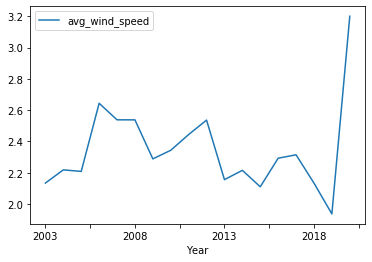

In [72]:
df_yr_wind_grp.plot(kind="line")

# Creating a dataframe by groupby then changing index data type and sorting index and creating line chart

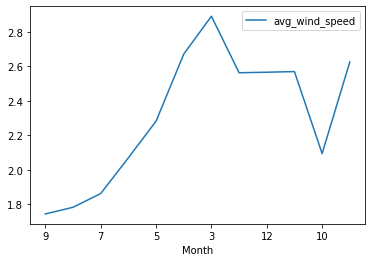

In [76]:
df_m_wind = df[["Month","avg_wind_speed"]]
df_m_wind_grp = df_m_wind.groupby(["Month"], as_index=True).mean()
df_m_wind_grp.sort_values(by=["Month"], ascending=False, inplace=True)
df_m_wind_grp
df_m_wind_grp.plot(kind="line")

In [79]:
df_m_wind_grp.sort_index(axis=0, inplace=True)
df_m_wind_grp

,avg_wind_speed
Month,
1,2.625191
10,2.093699
11,2.569627
12,2.566042
2,2.562920
3,2.890963
4,2.671417
5,2.282027
6,2.069520


In [80]:
df_m_wind_grp.index = pd.to_numeric(df_m_wind_grp.index, errors='coerce')

In [81]:
df_m_wind_grp.sort_index(axis=0, inplace=True)
df_m_wind_grp

,avg_wind_speed
Month,
1,2.625191
2,2.562920
3,2.890963
4,2.671417
5,2.282027
6,2.069520
7,1.861912
8,1.781992
9,1.743379


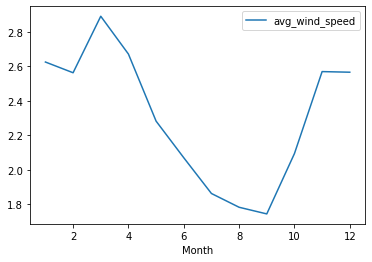

In [82]:
df_m_wind_grp.plot(kind="line")

# Calculating the % diff in wind in 2020 vs 2019
## Had to segment data for only the first 6 months of 2020 and 2019

In [95]:
df_wyty = df[["Year","Month","avg_wind_speed"]]
df_wyty.Month = df_wyty.Month.astype("int")
df_wyty = df_wyty[df_wyty["Month"]<7]
df_wyty["Month"].value_counts()

5    513
6    500
1    497
3    488
4    480
2    452
Name: Month, dtype: int64

In [98]:
df_wyty_grp = df_wyty.groupby(["Year"]).mean()
df_wyty_grp.drop(["Month"], axis=1, inplace=True)

df_wyty_grp

,avg_wind_speed
Year,
2003,2.179184
2004,2.349719
2005,2.278036
2006,2.949834
2007,2.675500
2008,2.772527
2009,2.463128
2010,2.578950
2011,2.779116


In [109]:
wind2019 = df_wyty_grp.iloc[16,0]
print("This is the mean wind speed in 2019:",wind2019)
wind2020 = df_wyty_grp.iloc[17,0]
print("This is the mean wind speed in 2020:",wind2020)
windchange = round((((wind2020-wind2019)/wind2019)*100),1)
print("This is the % difference in 2020:",windchange,"%")

This is the mean wind speed in 2019: 2.065469613259668
This is the mean wind speed in 2020: 3.2
This is the % difference in 2020: 54.9 %
